In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r"C:\Users\manth\Downloads\pizza_v2.csv")
df

,company,price_rupiah,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms
0,A,"Rp235,000",22 inch,chicken,double_signature,jumbo,yes,yes,no
1,A,"Rp198,000",20 inch,papperoni,double_signature,jumbo,yes,yes,no
2,A,"Rp120,000",16 inch,mushrooms,double_signature,reguler,yes,yes,yes
3,A,"Rp155,000",14 inch,smoked_beef,double_signature,reguler,yes,no,yes
4,A,"Rp248,000",18 inch,mozzarella,double_signature,jumbo,yes,no,yes
...,...,...,...,...,...,...,...,...,...
124,E,"Rp39,000",8.5 inch,tuna,spicy tuna,small,yes,yes,yes
125,E,"Rp72,000",12 inch,tuna,spicy tuna,medium,yes,yes,yes
126,E,"Rp99,000",14 inch,tuna,spicy tuna,large,yes,yes,yes
127,E,"Rp44,000",8.5 inch,meat,BBQ_meat_fiesta,small,yes,no,yes


In [3]:
# check the number of row and columns
df.shape

(129, 9)

In [4]:
# check the data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129 entries, 0 to 128
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   company          129 non-null    object
 1   price_rupiah     129 non-null    object
 2   diameter         129 non-null    object
 3   topping          129 non-null    object
 4   variant          129 non-null    object
 5   size             129 non-null    object
 6   extra_sauce      129 non-null    object
 7   extra_cheese     129 non-null    object
 8   extra_mushrooms  129 non-null    object
dtypes: object(9)
memory usage: 9.2+ KB


In [5]:
# check the null values
df.isnull().sum()

company            0
price_rupiah       0
diameter           0
topping            0
variant            0
size               0
extra_sauce        0
extra_cheese       0
extra_mushrooms    0
dtype: int64

In [6]:
# check the duplicated values
df.duplicated(keep = False).sum()

4

In [7]:
# drop the duplicate values
df.drop_duplicates(inplace = True)

In [8]:
df

,company,price_rupiah,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms
0,A,"Rp235,000",22 inch,chicken,double_signature,jumbo,yes,yes,no
1,A,"Rp198,000",20 inch,papperoni,double_signature,jumbo,yes,yes,no
2,A,"Rp120,000",16 inch,mushrooms,double_signature,reguler,yes,yes,yes
3,A,"Rp155,000",14 inch,smoked_beef,double_signature,reguler,yes,no,yes
4,A,"Rp248,000",18 inch,mozzarella,double_signature,jumbo,yes,no,yes
...,...,...,...,...,...,...,...,...,...
124,E,"Rp39,000",8.5 inch,tuna,spicy tuna,small,yes,yes,yes
125,E,"Rp72,000",12 inch,tuna,spicy tuna,medium,yes,yes,yes
126,E,"Rp99,000",14 inch,tuna,spicy tuna,large,yes,yes,yes
127,E,"Rp44,000",8.5 inch,meat,BBQ_meat_fiesta,small,yes,no,yes


In [9]:
df['price_rupiah'] = df['price_rupiah'].str.replace('Rp','')
df['price_rupiah'] = df['price_rupiah'].str.replace(',','')
df['price_rupiah'] = df['price_rupiah'].astype(int)

In [10]:
df['diameter'] = df['diameter'].str.replace('inch','')

In [11]:
df['diameter'] = df['diameter'].astype(float)

In [12]:
df.dtypes

company             object
price_rupiah         int32
diameter           float64
topping             object
variant             object
size                object
extra_sauce         object
extra_cheese        object
extra_mushrooms     object
dtype: object

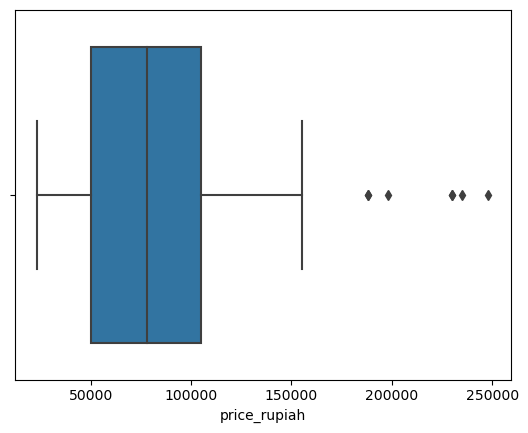

In [13]:
# check the outliers
sns.boxplot(x = 'price_rupiah',data = df)
plt.show()

In [14]:
q1,q3 = np.percentile(df['price_rupiah'],[25,75])
iqr = q3-q1
lower = q1-1.5*iqr
upper = q3+1.5*iqr
outlier = df['price_rupiah'][(df['price_rupiah']<lower)|(df['price_rupiah']>upper)]
print(outlier)
print(min(outlier))

0     235000
1     198000
4     248000
20    230000
21    188000
84    230000
85    188000
Name: price_rupiah, dtype: int32
188000


In [15]:
# remove outliers
df = df[df['price_rupiah']<=188000]
df

,company,price_rupiah,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms
2,A,120000,16.0,mushrooms,double_signature,reguler,yes,yes,yes
3,A,155000,14.0,smoked_beef,double_signature,reguler,yes,no,yes
5,A,140000,18.5,black_papper,american_favorite,jumbo,no,no,yes
6,A,110000,16.0,smoked_beef,american_favorite,jumbo,no,yes,yes
7,A,70000,8.0,papperoni,american_favorite,reguler,no,no,yes
...,...,...,...,...,...,...,...,...,...
124,E,39000,8.5,tuna,spicy tuna,small,yes,yes,yes
125,E,72000,12.0,tuna,spicy tuna,medium,yes,yes,yes
126,E,99000,14.0,tuna,spicy tuna,large,yes,yes,yes
127,E,44000,8.5,meat,BBQ_meat_fiesta,small,yes,no,yes


In [16]:
# count topping
df['topping'].value_counts()

chicken         25
mushrooms       22
smoked_beef     19
mozzarella      19
tuna             9
vegetables       9
meat             8
black_papper     3
sausage          3
beef             3
papperoni        1
onion            1
Name: topping, dtype: int64

In [17]:
# count variant
df['variant'].value_counts()

classic              30
meat_lovers          10
crunchy              10
double_decker         9
double_mix            8
new_york              8
BBQ_meat_fiesta       5
super_supreme         5
american_favorite     5
gournet_greek         3
neptune_tuna          3
american_classic      3
thai_veggie           3
italian_veggie        3
spicy tuna            3
meat_eater            3
extravaganza          3
BBQ_sausage           3
spicy_tuna            3
double_signature      2
Name: variant, dtype: int64

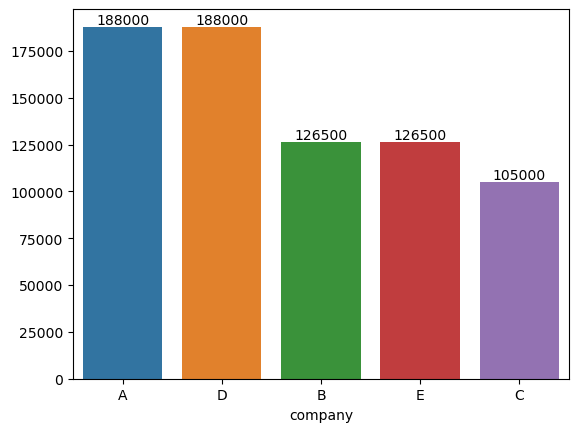

In [18]:
# data visulizations
a = df.groupby('company')['price_rupiah'].max().sort_values(ascending = False).head(5)
b = sns.barplot(x = a.index,y = a.values,data = df)
for i in b.containers:
    b.bar_label(i,)
plt.show()

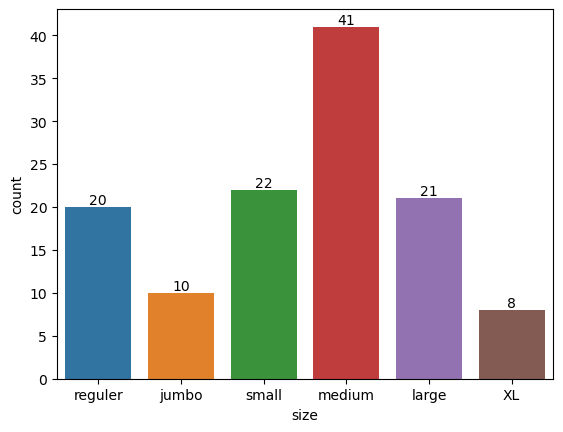

In [19]:
c = sns.countplot(x = 'size',data = df)
for i in c.containers:
    c.bar_label(i,)
plt.show()

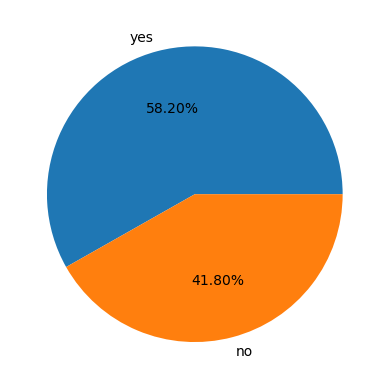

In [20]:
d = df['extra_sauce'].value_counts()
plt.pie(x = d.values,labels = d.index,autopct='%.2f%%')
plt.show()

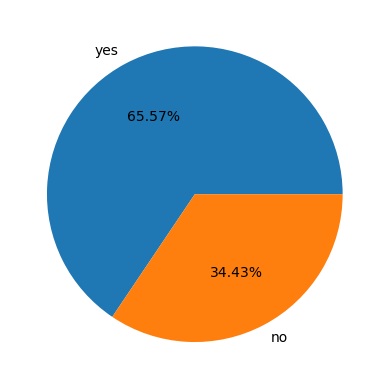

In [21]:
e = df['extra_cheese'].value_counts()
plt.pie(x = e.values,labels = e.index,autopct='%.2f%%')
plt.show()

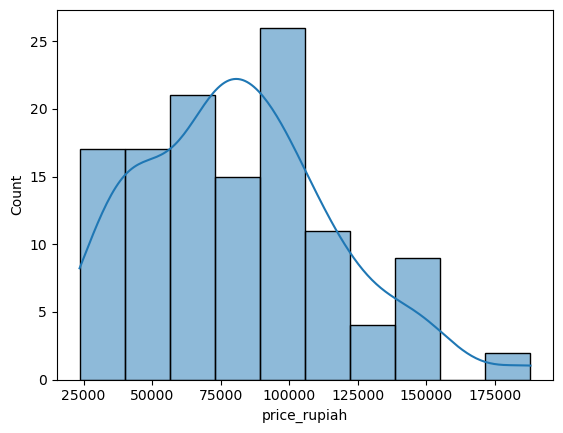

In [22]:
sns.histplot(x = 'price_rupiah',data = df,kde = True,bins = 10)
plt.show()

In [23]:
# future encoding
from sklearn.preprocessing import LabelEncoder

In [24]:
la = LabelEncoder()

In [25]:
df['newcompany'] = la.fit_transform(df['company'])
df['newtopping'] = la.fit_transform(df['topping'])
df['newvariant'] = la.fit_transform(df['variant'])
df['newsize'] = la.fit_transform(df['size'])
df['newextra_sauce'] = la.fit_transform(df['extra_sauce'])
df['newextra_cheese'] = la.fit_transform(df['extra_cheese'])
df['newextra_mushrooms'] = la.fit_transform(df['extra_mushrooms'])

C:\Users\manth\AppData\Local\Temp\ipykernel_8668\4085179271.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['newcompany'] = la.fit_transform(df['company'])
C:\Users\manth\AppData\Local\Temp\ipykernel_8668\4085179271.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['newtopping'] = la.fit_transform(df['topping'])
C:\Users\manth\AppData\Local\Temp\ipykernel_8668\4085179271.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,c

In [26]:
df.drop(['company','topping','variant','size','extra_sauce','extra_cheese','extra_mushrooms'],axis = 1,inplace = True)

C:\Users\manth\AppData\Local\Temp\ipykernel_8668\2467713714.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(['company','topping','variant','size','extra_sauce','extra_cheese','extra_mushrooms'],axis = 1,inplace = True)


In [27]:
df

,price_rupiah,diameter,newcompany,newtopping,newvariant,newsize,newextra_sauce,newextra_cheese,newextra_mushrooms
2,120000,16.0,0,5,8,4,1,1,1
3,155000,14.0,0,9,8,4,1,0,1
5,140000,18.5,0,1,3,1,0,0,1
6,110000,16.0,0,9,3,1,0,1,1
7,70000,8.0,0,7,3,4,0,0,1
...,...,...,...,...,...,...,...,...,...
124,39000,8.5,4,10,16,5,1,1,1
125,72000,12.0,4,10,16,3,1,1,1
126,99000,14.0,4,10,16,2,1,1,1
127,44000,8.5,4,3,0,5,1,0,1


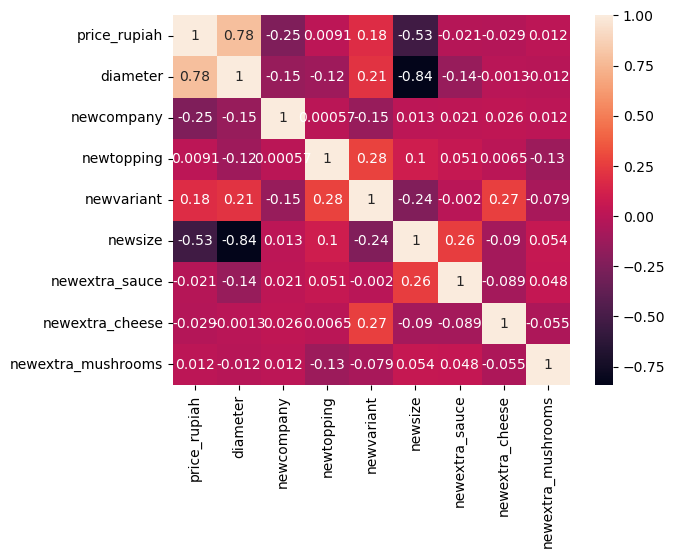

In [28]:
cor = df.corr()
sns.heatmap(cor,annot = True)
plt.show()

In [29]:
x = df.drop('price_rupiah',axis = 1).values
x

array([[16. ,  0. ,  5. ,  8. ,  4. ,  1. ,  1. ,  1. ],
       [14. ,  0. ,  9. ,  8. ,  4. ,  1. ,  0. ,  1. ],
       [18.5,  0. ,  1. ,  3. ,  1. ,  0. ,  0. ,  1. ],
       [16. ,  0. ,  9. ,  3. ,  1. ,  0. ,  1. ,  1. ],
       [ 8. ,  0. ,  7. ,  3. ,  4. ,  0. ,  0. ,  1. ],
       [12. ,  0. ,  5. ,  3. ,  4. ,  1. ,  0. ,  1. ],
       [12. ,  0. ,  9. ,  3. ,  4. ,  0. ,  0. ,  0. ],
       [18.5,  0. ,  4. , 18. ,  1. ,  0. ,  0. ,  0. ],
       [16. ,  0. ,  1. , 18. ,  1. ,  1. ,  1. ,  0. ],
       [ 8. ,  0. ,  9. , 18. ,  4. ,  1. ,  1. ,  0. ],
       [12. ,  0. ,  1. , 18. ,  4. ,  0. ,  1. ,  0. ],
       [12. ,  0. ,  4. , 18. ,  4. ,  0. ,  1. ,  0. ],
       [18.5,  0. ,  4. , 13. ,  1. ,  0. ,  1. ,  1. ],
       [16. ,  0. ,  9. , 13. ,  1. ,  0. ,  1. ,  1. ],
       [ 8. ,  0. ,  2. , 13. ,  4. ,  1. ,  1. ,  1. ],
       [12. ,  0. ,  5. , 13. ,  4. ,  1. ,  1. ,  1. ],
       [12. ,  0. ,  4. , 13. ,  4. ,  1. ,  1. ,  1. ],
       [18.5,  0. ,  5. ,  7. ,

In [30]:
y = df['price_rupiah'].values
y

array([120000, 155000, 140000, 110000,  70000,  90000,  90000, 140000,
       110000,  70000,  90000,  90000, 140000, 110000,  70000,  90000,
        90000, 188000, 114000, 149000, 149000,  23500,  46000,  72000,
        49000,  83000,  96000,  31000,  69000,  93000,  75000, 115000,
       123000,  33000,  46000,  72000,  76000, 119000, 126500,  75000,
        46000,  72000,  49000,  83000,  96000,  39000,  72000,  99000,
        44000,  78000, 105000,  39000,  72000,  99000,  35000,  60000,
        98000,  35000,  60000,  98000,  44000,  78000, 105000,  28000,
        51000,  84000,  39000,  72000,  99000,  35000,  60000,  98000,
        32000,  54000,  92000, 140000, 110000,  70000,  90000,  90000,
       188000, 114000, 149000, 149000,  23500,  46000,  72000,  49000,
        83000,  96000,  31000,  69000,  93000,  75000, 115000,  23500,
        46000,  72000,  49000,  83000,  96000,  31000,  69000,  93000,
        75000, 123000,  33000,  46000,  72000,  76000, 119000, 126500,
      

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 0)

In [33]:
from sklearn.ensemble import RandomForestRegressor

In [34]:
model = RandomForestRegressor(n_estimators=100)

In [35]:
model.fit(x_train,y_train)

RandomForestRegressor()

In [36]:
y_pre = model.predict(x_test)
y_pre

array([ 33955.,  82860.,  84310.,  87490.,  91670.,  35950.,  57420.,
       139650.,  63510.,  40095.,  86840.,  63915.,  32525.,  32760.,
       152020.,  82430.,  86280.,  59095.,  69275.,  68365.,  37990.,
        51195.,  35835.,  86040.,  53195.])

In [37]:
y_test

array([ 23500,  72000,  90000,  98000, 110000,  39000,  46000, 140000,
        78000,  31000,  72000,  76000,  33000,  39000, 140000,  90000,
        83000,  49000,  78000,  75000,  23500,  31000,  44000,  90000,
        46000])

In [38]:
model.score(x_test,y_test)

0.8972093638265722